# tasks

## Load Your Saved Joblib File
- Create a new notebook for this assignment in your project 1 repository. Name the notebook "Explaining Models with Shap.ipynb"
- In your notebook, load the contents of your "best-models.joblib" file into a variable called "loaded_joblib."
- Save each object from the loaded_joblib dictionary as a separate variable in your notebook. (e.g. "X_train = loaded_joblib['X_train'])

In [4]:
import os
os.makedirs("images/", exist_ok=True)
import matplotlib.pyplot as plt
import joblib
loaded_joblib = joblib.load("best_models.joblib")
loaded_joblib.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'RandomForestRegressor', 'LinearRegression'])

In [5]:
## Saving the dictionary data into separate variables
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test  = loaded_joblib['X_test']
y_test  = loaded_joblib['y_test']
##  Saving the model and processing tools to new vars
rf_reg  = loaded_joblib['RandomForestRegressor']
lin_reg  = loaded_joblib['LinearRegression']#not needed for assingment but instanciated anyways.

preprocessor = loaded_joblib['preprocessor']

## Explain your tree-based model with shap:
- Create an X_shap and y_shap variable from your training data (use shap.sample as needed).
- Create a model explainer
- Calculate the shap values for your model.
- Create a summary plot - with plot_type='bar':
    - In a Markdown cell below, display your saved feature importance image (that you used in your README) and compare the most important features according to SHAP vs. your original feature importances.
        - Are they the same features in both? If not, what's different?
    - Save your bar summary plot figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).
- Create a second summary plot - with plot_type='dot'
    - In a markdown cell, interpret the top 3 most important features and how they influence your model's predictions.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

In [6]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [7]:
#Create an X_shap and y_shap variable from your training data.
X_shap = shap.sample(X_train,nsamples=400,random_state=321)
X_shap


 

,Item_Weight,Item_Visibility,Item_MRP,Item_Fat_Content_Low Fat,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small
4469,7.720000,0.074669,76.3986,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4438,5.110000,0.034868,163.8210,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
366,8.050000,0.078386,256.4646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2219,8.760000,0.050131,128.3336,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6080,6.590000,0.176748,82.7908,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,6.670000,0.150555,130.0626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4680,14.300000,0.034383,96.5726,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1288,16.000000,0.041029,142.6496,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3635,12.822634,0.113213,254.6040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
y_shap = y_train.loc[X_shap.index].astype(int)
y_shap

4469    1402
4438    2120
366     5153
2219    2556
6080      83
        ... 
215      131
4680    2251
1288    1834
3635     759
7936    4074
Name: Item_Outlet_Sales, Length: 400, dtype: int32

In [9]:
# create model explainer
explainer = shap.Explainer(rf_reg)
explainer

In [10]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

In [11]:
# confirming shap values are 2 dimension
shap_values.shape

(400, 22)

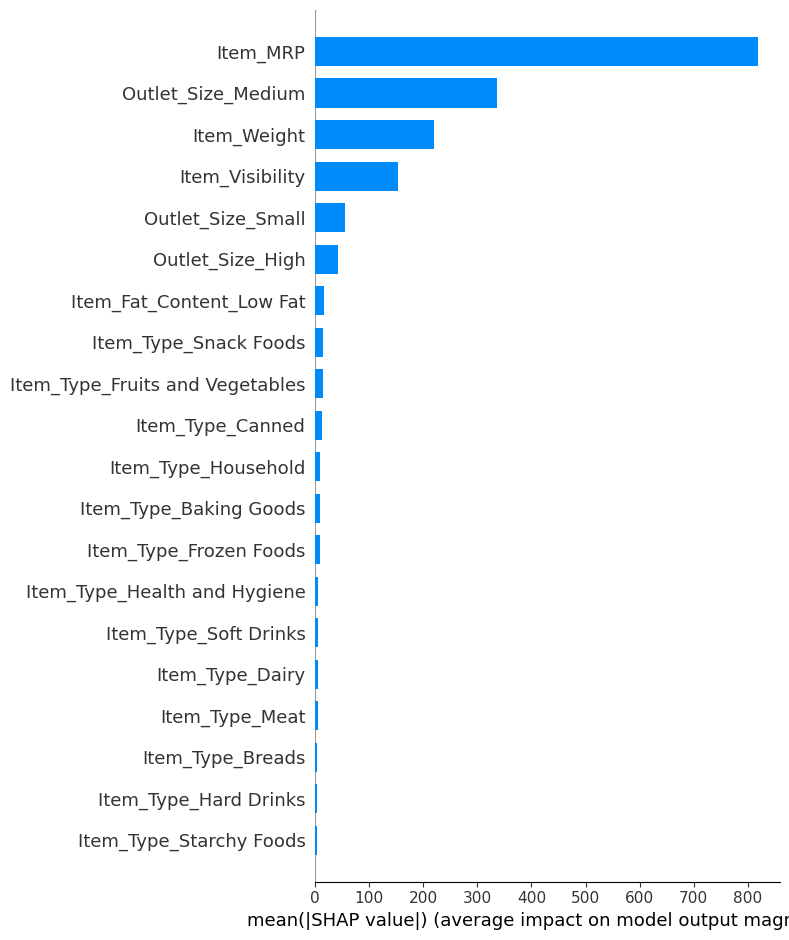

In [12]:
#Create a summary plot - with plot_type='bar':
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_1.png')

### feature importance  plot.
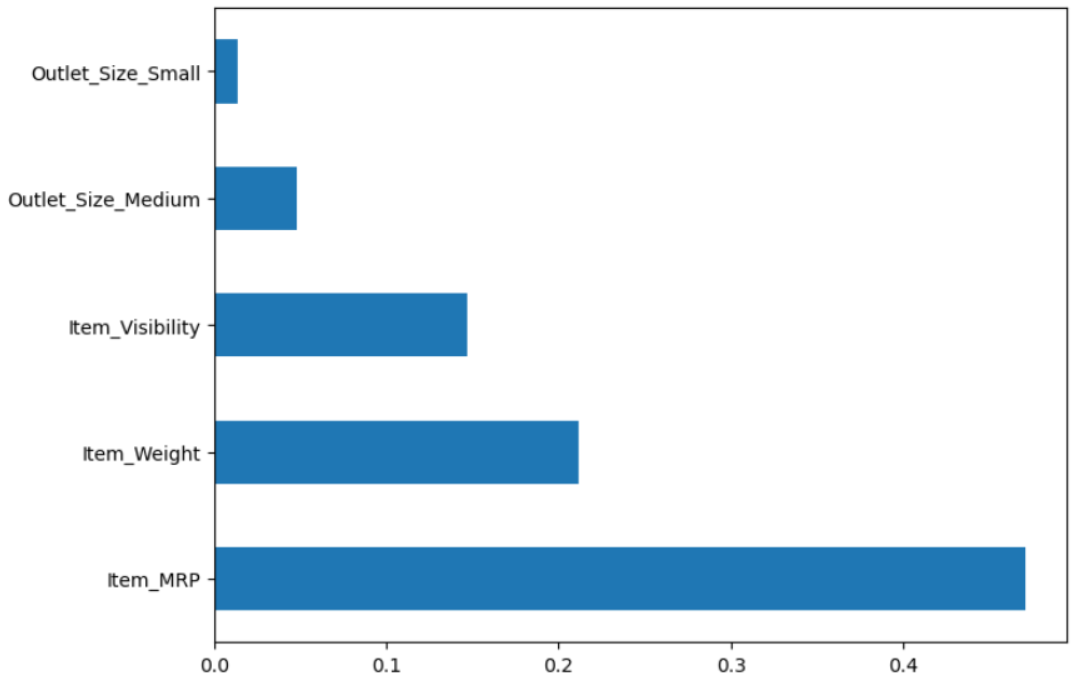

- the two visuals echo the same importances with one exception.
    - noteably the outlet size medium has been promoted  two levels of importance than in the previous visual.
    - while item_mrp remains ahead of the pack by double in both cases.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


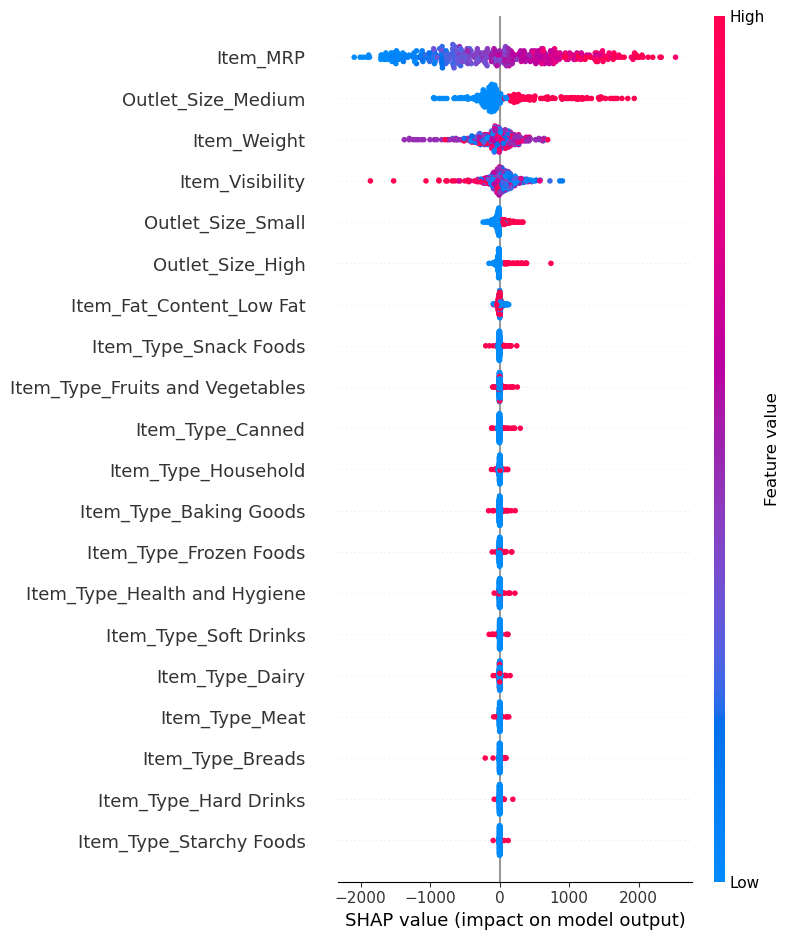

In [13]:
#Create a second summary plot - with plot_type='dot'
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap)
# Save your figure as a .png file inside your repository
fig.savefig('images/summary_plot_2.png')

### interpret the top 3 most important features and how they influence your model's predictions.
1. item_mrp:
    - the higher an items mrp(red),the more likely it is to positivly impact our predictive model.  
2. outlet_size_medium:
    - the  higher count of medium size stores(red)  will positivly impact our prediction.
3. item_weight:
    - a central cluster of our valaues with mixed feature value colors indicates an average/typical impact on the model predictions.


# Local Explanations(Core) add on

### tasks
- Select at least 2 example rows based on the insights gained from your previous core assignments this week.
- Explain why you selected the examples that you did.
    - If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).
- For each example, produce :
    - A Lime tabular explanation
        - Interpret what features most heavily influenced the predictions, according to LIME.
        - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the lime explanation.
- An individual Force Plot
    - Interpret what features most heavily influenced the predictions, according to SHAP.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: You will need to take a screenshot to save the individual force plot.


## Update your README.
- Add your explanation for why you selected the individual examples that you visualized.
- For each example (need at least 2 examples)
    - A Lime tabular explanation
        - Your corresponding interpretation
    - A sharp force plot
- Your corresponding interpretation.

In [17]:
## check out the cols to pick from
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 8269 to 6682
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      6392 non-null   float64
 1   Item_Visibility                  6392 non-null   float64
 2   Item_MRP                         6392 non-null   float64
 3   Item_Fat_Content_Low Fat         6392 non-null   float64
 4   Item_Type_Baking Goods           6392 non-null   float64
 5   Item_Type_Breads                 6392 non-null   float64
 6   Item_Type_Breakfast              6392 non-null   float64
 7   Item_Type_Canned                 6392 non-null   float64
 8   Item_Type_Dairy                  6392 non-null   float64
 9   Item_Type_Frozen Foods           6392 non-null   float64
 10  Item_Type_Fruits and Vegetables  6392 non-null   float64
 11  Item_Type_Hard Drinks            6392 non-null   float64
 12  Item_Type_Health 